<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/TimeSeriesForecasting/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross validation strategies


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

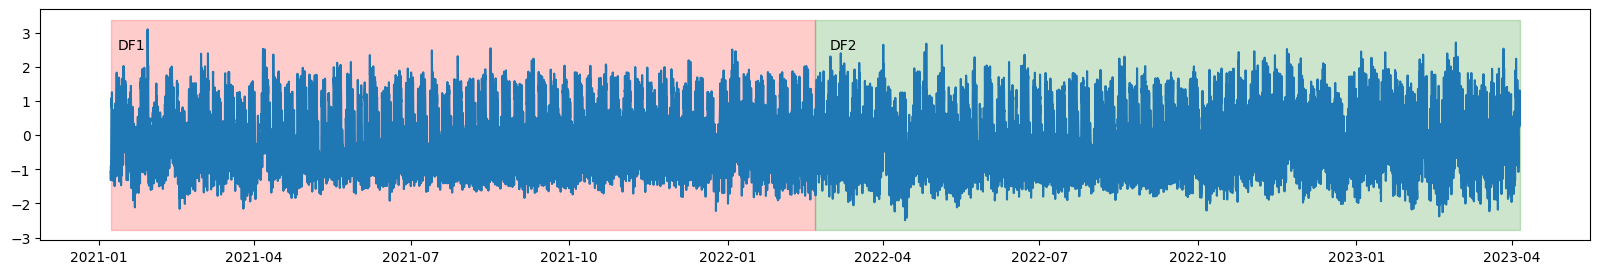

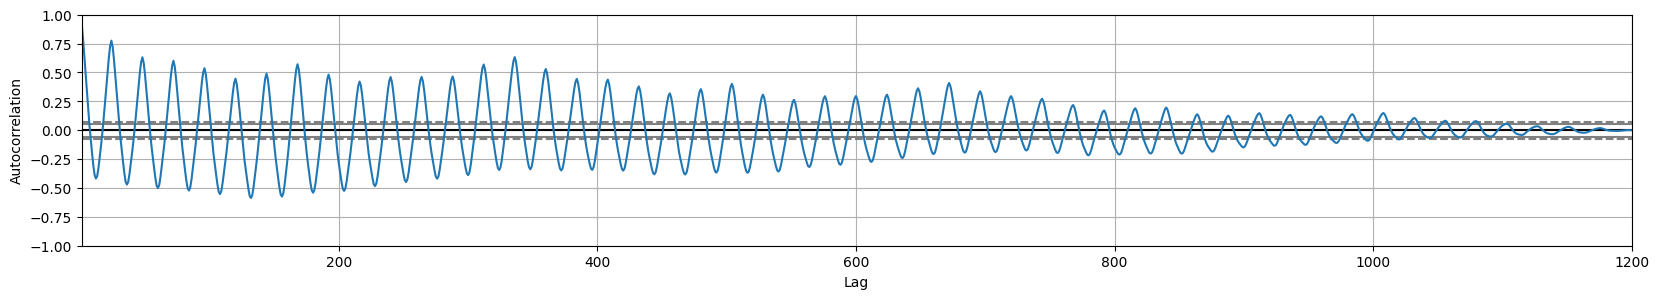

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(pd.read_pickle("https://github.com/nepslor/teaching/raw/main/TimeSeriesForecasting/data/tsc_example.pk"))


# TS plot
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
ax.plot(df)
ylims = ax.get_ylim()
ax.fill_betweenx(ylims, df.index[0], df.index[int(len(df)/2)], color='red', alpha=0.2)
ax.fill_betweenx(ylims, df.index[int(len(df)/2)], df.index[-1], color='green', alpha=0.2)
ax.text(df.index[100], 2.5, 'DF1')
ax.text(df.index[int(len(df)*0.51)], 2.5, 'DF2')

# ACF plot
plt.figure(figsize=(20, 3))
pd.plotting.autocorrelation_plot(df.iloc[:24*50])

In [ ]:
df_1, df_2 = df.iloc[:int(len(df)/2)], df.iloc[int(len(df)/2):]

In [ ]:
def get_hankel(df, embedding=3):
  dfs = {}
  for c in df.columns:
    df_i = pd.concat([df[[c]].shift(-l) for l in range(embedding)], axis=1).iloc[:-embedding]
    df_i.columns = [i for i in range(df_i.shape[1])]
    dfs[c] = df_i
  return pd.concat(dfs, axis=1)